### HISTORY
## THE PROJECT WILL PROGRESS IN PIECE
### PART II: VISION PROCESS EXAMPLE, ASTRONOMIC DATA, DATA ENGINEERING


#### Space Objects Around All Black Holes
* A dataset containing the objects around all black holes (planets, meteors, comets, etc.) and the environments in which black holes have been observed so far by Hubble.

* Filenames are the names of black holes.

* Files are coded as fits.


#### CHECK CHAPTER I:
* https://www.kaggle.com/brsdincer/space-objects-around-black-holes-fits-analysis-i

# PACKAGES AND LIBRARIES

In [ ]:
!pip install astropy

In [ ]:
!pip install spiceypy

In [ ]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import random
import time
import datetime
import spiceypy
import matplotlib.colors
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
from scipy.io import loadmat
import nibabel as nib
import csv
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import astropy
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
from IPython import display
from scipy.ndimage import gaussian_filter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as patches
import plotly.express as px
from matplotlib.collections import PolyCollection
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
from scipy import signal
from scipy.fft import fftshift
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape, Conv2DTranspose,\
LeakyReLU, GaussianNoise, GlobalMaxPooling2D, ReLU, Input, Concatenate
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
from keras.models import Model
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# PATH PROCESS

#### PATH & LABELS & SERIES & DATAFRAME

In [ ]:
General_FITS_Path = Path("../input/space-objects-around-black-holes-esa/NEAR THE BLACK HOLE")

In [ ]:
FITS_Path = list(General_FITS_Path.glob(r"**/*.fits"))

In [ ]:
Example_Path = "../input/space-objects-around-black-holes-esa/NEAR THE BLACK HOLE/SAGITTARIUS-A/HST-OPTICAL/hst_07909_rb_wfpc2_f606w_pc_drz.fits"

Splitting_List = os.path.split(Example_Path)
print(Splitting_List[0])
print("---"*10)
Label_Splitting = os.path.split(Splitting_List[0])
print(Label_Splitting[0])
print("---"*10)
Target_Label = os.path.split(Label_Splitting[0])
print("TARGET: ",Target_Label[1])
print("---"*10)

In [ ]:
Path_Series = pd.Series(FITS_Path,name="PATH").astype(str)

In [ ]:
Path_Series

In [ ]:
New_Path_List = []
New_Label_List = []

for path_x,label_x in zip(Path_Series.values,Path_Series.values):
    
    Splitting_List = os.path.split(label_x)
    Label_Splitting = os.path.split(Splitting_List[0])
    Target_Label = os.path.split(Label_Splitting[0])
    
    New_Path_List.append(path_x)
    New_Label_List.append(Target_Label[1])

In [ ]:
print("FIRST 10 LABEL:\n")
print(New_Path_List[:10])
print("---"*10,"\n")
print("FIRST 10 PATH:\n")
print(New_Label_List[:10])

In [ ]:
print("LEN PATH LIST: ",len(New_Path_List))
print("---"*10,"\n")
print("LEN LABEL LIST: ",len(New_Label_List))

#### TO SERIES

In [ ]:
Path_Series = pd.Series(New_Path_List,name="PATH").astype(str)
Label_Series = pd.Series(New_Label_List,name="BLACK_HOLES")

In [ ]:
Path_Series

In [ ]:
print(Label_Series.unique())

#### TO DATAFRAME

In [ ]:
Main_Data = pd.concat([Path_Series,Label_Series],axis=1)

In [ ]:
Main_Data

In [ ]:
Main_Data = Main_Data[Main_Data["BLACK_HOLES"] != "HST"]
Main_Data = Main_Data.reset_index(drop=True)

In [ ]:
Main_Data

# DATA ENGINEERING

#### PICKING & INFORMATIONS & GETTING ACCESS

In [ ]:
print("Document_1: ",Main_Data["BLACK_HOLES"][22])
print("Document_2: ",Main_Data["BLACK_HOLES"][15])
print("Document_3: ",Main_Data["BLACK_HOLES"][50])

In [ ]:
Document_1 = fits.open(Main_Data["PATH"][22])
Document_2 = fits.open(Main_Data["PATH"][15])
Document_3 = fits.open(Main_Data["PATH"][50])

In [ ]:
print("INFORMATION\n")
print(Document_1.info())

In [ ]:
DOC_1_H = list(Document_1[0].header.keys())
print(DOC_1_H[:5])

In [ ]:
print("INFORMATION\n")
print(Document_2.info())

In [ ]:
DOC_2_H = list(Document_2[0].header.keys())
print(DOC_2_H[:5])

In [ ]:
print("INFORMATION\n")
print(Document_3.info())

In [ ]:
DOC_3_H = list(Document_3[0].header.keys())
print(DOC_3_H[:5])

In [ ]:
print("general galaxy type:\n")
print(Document_1[0].header['TARDESCR'])
print("----"*10)
print("general galaxy type:\n")
print(Document_2[0].header['TARDESCR'])
print("----"*10)
print("general galaxy type:\n")
print(Document_3[0].header['TARDESCR'])

In [ ]:
print("Subtract dark image:\n")
print(Document_1[0].header['DARKCORR'])
print("----"*10)
print("Subtract dark image:\n")
print(Document_2[0].header['DARKCORR'])
print("----"*10)
print("Subtract dark image:\n")
print(Document_3[0].header['DARKCORR'])

In [ ]:
print("proposer's target name:\n")
print(Document_1[0].header['targname'])
print("----"*10)
print("proposer's target name:\n")
print(Document_2[0].header['targname'])
print("----"*10)
print("proposer's target name:\n")
print(Document_3[0].header['targname'])

**MESSIER 60**


![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Messier_60_Hubble_WikiSky.jpg/250px-Messier_60_Hubble_WikiSky.jpg)


* GO TO REAL TIME IMAGE IMAGE:
http://www.worldwidetelescope.org/webclient/?wtml=http%3A%2F%2Fwww.worldwidetelescope.org%2Fwwtweb%2Fgoto.aspx%3Fra%3D8.866522296736026%26dec%3D39.53352040841299%26zoom%3D30.837925863901404%26wtml%3Dtrue#/place=86.1418&cf=0&ra=12.72781&dec=11.55428&fov=0.23438

**H1821+643**

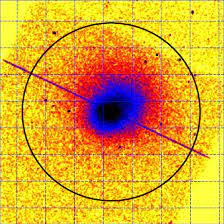


* GO TO REAL TIME IMAGE:
http://www.worldwidetelescope.org/webclient/?wtml=http%3A%2F%2Fwww.worldwidetelescope.org%2Fwwtweb%2Fgoto.aspx%3Fra%3D18.3658849830863%26dec%3D64.34350920197666%26zoom%3D0.2814845290812542%26wtml%3Dtrue#/place=Open_Collections..0&ra=18.36588&dec=64.34351&fov=0.04691

##### H1821+643 is a quasar in the constellation of Draco

**NGC4151**

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/NGC4151_Galaxy_from_the_Mount_Lemmon_SkyCenter_Schulman_Telescope_courtesy_Adam_Block.jpg/300px-NGC4151_Galaxy_from_the_Mount_Lemmon_SkyCenter_Schulman_Telescope_courtesy_Adam_Block.jpg)

* GO TO REAL TIME:
http://www.worldwidetelescope.org/webclient/?wtml=http%3A%2F%2Fwww.worldwidetelescope.org%2Fwwtweb%2Fgoto.aspx%3Fra%3D18.3658849830863%26dec%3D64.34350920197666%26zoom%3D0.2814845290812542%26wtml%3Dtrue#/place=12.25&ra=12.17570&dec=39.40580&fov=0.10089

In [ ]:
print("declination of the target (deg) (J2000):\n")
print(Document_1[0].header['DEC_TARG']) # space-time y coordinate
print("---"*10)
print("declination of the target (deg) (J2000):\n")
print(Document_2[0].header['DEC_TARG']) # space-time y coordinate
print("---"*10)
print("declination of the target (deg) (J2000):\n")
print(Document_3[0].header['DEC_TARG']) # space-time y coordinate
print("---"*10)

In [ ]:
print("right ascension of the target (deg) (J2000):\n")
print(Document_1[0].header['RA_TARG']) # space-time x coordinate
print("---"*10)
print("right ascension of the target (deg) (J2000):\n")
print(Document_2[0].header['RA_TARG']) # space-time x coordinate
print("---"*10)
print("right ascension of the target (deg) (J2000):\n")
print(Document_3[0].header['RA_TARG']) # space-time x coordinate
print("---"*10)

* CHECK REAL COORDINATES FOR DOCUMENT_1:
http://www.worldwidetelescope.org/webclient/?wtml=http%3A%2F%2Fwww.worldwidetelescope.org%2Fwwtweb%2Fgoto.aspx%3Fra%3D6.9021980600321005%26dec%3D24.716948887357187%26zoom%3D30.837925863901404%26wtml%3Dtrue#/place=Open_Collections..0&ra=6.90220&dec=24.71695&fov=0.04098

* CHECK REAL COORDINATES FOR DOCUMENT_2:
http://www.worldwidetelescope.org/webclient/?wtml=http%3A%2F%2Fwww.worldwidetelescope.org%2Fwwtweb%2Fgoto.aspx%3Fra%3D12.088791680939023%26dec%3D3.9420303331287054%26zoom%3D30.837925863901404%26wtml%3Dtrue#/place=Open_Collections..0&ra=12.08879&dec=3.94203&fov=0.17029

* CHECK REAL TIME COORDINATES FOR DOCUMENT_3:
http://www.worldwidetelescope.org/webclient/?wtml=http%3A%2F%2Fwww.worldwidetelescope.org%2Fwwtweb%2Fgoto.aspx%3Fra%3D8.866522296736026%26dec%3D39.53352040841299%26zoom%3D30.837925863901404%26wtml%3Dtrue#/place=Open_Collections..0&ra=8.86652&dec=39.53352&fov=2.21245

In [ ]:
print("imaging or spectroscopic:\n")
print(Document_1[0].header['OBSTYPE'])
print("---"*10)
print("imaging or spectroscopic:\n")
print(Document_2[0].header['OBSTYPE'])
print("---"*10)
print("imaging or spectroscopic:\n")
print(Document_3[0].header['OBSTYPE'])
print("---"*10)

In [ ]:
print("minimum wavelength in spectrum:\n")
print(Document_1[0].header['MINWAVE'])
print("---"*10)
print("minimum wavelength in spectrum:\n")
print(Document_2[0].header['MINWAVE'])
print("---"*10)
print("minimum wavelength in spectrum:\n")
print(Document_3[0].header['MINWAVE'])
print("---"*10)

* Visible wavelengths cover a range from approximately 400 to 800 nm. The longest visible wavelength is red and the shortest is violet. Other common colors of the spectrum, in order of decreasing wavelength, may be remembered by the mnemonic: ROY G BIV.

* CHECK: 
https://www2.chemistry.msu.edu/faculty/reusch/virttxtjml/spectrpy/uv-vis/spectrum.htm

In [ ]:
print("maximum wavelength in spectrum:\n")
print(Document_1[0].header['MAXWAVE'])
print("---"*10)
print("maximum wavelength in spectrum:\n")
print(Document_2[0].header['MAXWAVE'])
print("---"*10)
print("maximum wavelength in spectrum:\n")
print(Document_3[0].header['MAXWAVE'])
print("---"*10)

In [ ]:
print("angle between sun and V1 axis:\n")
print(Document_1[1].header['SUNANGLE'])
print("---"*10)
print("angle between sun and V1 axis:\n")
print(Document_2[1].header['SUNANGLE'])
print("---"*10)
print("angle between sun and V1 axis:\n")
print(Document_3[1].header['SUNANGLE'])
print("---"*10)

#### ANGLE BETWEEN SUN

![](https://v1.nitrocdn.com/hlYTJaNDVwYkdtkDEjTIbpVANhqcsjrd/assets/static/optimized/rev-95b3bb3/wp-content/uploads/2021/04/declination-angle-earth-sun.png)

#### ANGLE BETWEEN VECTORS
![](http://www.euclideanspace.com/maths/algebra/vectors/angleBetween/twod.gif)

In [ ]:
print("angle between moon and V1 axis:\n")
print(Document_1[1].header['MOONANGL'])
print("---"*10)
print("angle between moon and V1 axis:\n")
print(Document_2[1].header['MOONANGL'])
print("---"*10)
print("angle between moon and V1 axis:\n")
print(Document_3[1].header['MOONANGL'])
print("---"*10)

#### ANGLE BETWEEN MOON

![](https://www.mdpi.com/remotesensing/remotesensing-11-02611/article_deploy/html/images/remotesensing-11-02611-g001.png)

#### Equatorial Coordinates
* If you specify the target position directly in terms of equatorial coordinates (as opposed to specifying an offset or a region), then the right ascension and declination values must be provided:
    
RA: value
    
DEC: value
    
RA: +/– uncertainty

DEC: +/– uncertainty
    

* The coordinates must be in Equinox J2000.

* The uncertainties should represent the accuracy (1 sigma) of the target coordinates, not the region within which a target could be observed (e.g., for a sky measurement). See Section 3.2.5 for instructions on how to designate regions as targets.

* The right-ascension value must be expressed in hours (H), minutes (M), and seconds of time (S). If expressed as decimal degrees (e.g. 15.5), APT will automatically convert to HMS format (e.g. 01H 02M 00.0S). Note that it is not possible to enter RA in decimal hours.

* The declination value must be expressed in degrees (D), minutes ('), and seconds (") of arc. If expressed as decimal degrees (e.g. -20.5), APT will automatically convert to DMS format (e.g. -20D 30’ 00.0”).

* The units must be selected (from a pull down list). The allowed values are given in the table below.


* CHECK:
https://www.stsci.edu/itt/APT_help/P2PI_ENG/ch03_targ_fixed3.html

![](https://www.stsci.edu/itt/APT_help/P2PI_ENG/images/ch03_targ_fixed3.1.jpg)

In [ ]:
print("RA of aperture reference position:\n")
print(Document_1[1].header['RA_APER'])
print("---"*10)
print("RA of aperture reference position:\n")
print(Document_2[1].header['RA_APER'])
print("---"*10)
print("RA of aperture reference position:\n")
print(Document_3[1].header['RA_APER'])
print("---"*10)

In [ ]:
print("Declination of aperture reference position:\n")
print(Document_1[1].header['DEC_APER'])
print("---"*10)
print("Declination of aperture reference position:\n")
print(Document_2[1].header['DEC_APER'])
print("---"*10)
print("Declination of aperture reference position:\n")
print(Document_3[1].header['DEC_APER'])
print("---"*10)

In [ ]:
print("Position Angle of reference aperture center:\n")
print(Document_1[1].header['PA_APER'])
print("---"*10)
print("Position Angle of reference aperture center:\n")
print(Document_2[1].header['PA_APER'])
print("---"*10)
print("Position Angle of reference aperture center:\n")
print(Document_3[1].header['PA_APER'])
print("---"*10)

#### ALL PARAMETERS

* check all of them

In [ ]:
HDR_Mirror = Document_1[0].header # we can use for all of documents, because parameters is same for both of them

In [ ]:
HDR_Mirror.comments['SIMPLE'] # example for information of keys

In [ ]:
for params_x in DOC_1_H:
    try:
        print(params_x,"\n")
        print(Main_Data["BLACK_HOLES"][22])
        print(Document_1[0].header[params_x])
        print(Main_Data["BLACK_HOLES"][15])
        print(Document_2[0].header[params_x])
        print(Main_Data["BLACK_HOLES"][50])
        print(Document_3[0].header[params_x])
        print("---"*5,"\n")
        print(HDR_Mirror.comments[params_x])
        print("---"*20,"\n")
    except:
        pass

#### NEW DATAFRAME

In [ ]:
Target_Spec_List = [Main_Data["BLACK_HOLES"][22],Main_Data["BLACK_HOLES"][15],Main_Data["BLACK_HOLES"][50]]

In [ ]:
Target_Path_List = [Main_Data["PATH"][22],Main_Data["PATH"][15],Main_Data["PATH"][50]]

In [ ]:
Series_Target = pd.Series(Target_Spec_List,name="TARGET")

In [ ]:
Series_Path = pd.Series(Target_Path_List,name="PATH").astype(str)

In [ ]:
Series_Target

In [ ]:
Series_Path

In [ ]:
Spec_Data = pd.concat([Series_Path,Series_Target],axis=1)

In [ ]:
Spec_Data

In [ ]:
Params_List = ["TARDESCR","DARKCORR","targname","DEC_TARG","RA_TARG","OBSTYPE","MINWAVE","MAXWAVE","SUNANGLE","MOONANGL","RA_APER","DEC_APER","PA_APER"]

TARDESCR_List = []
DARKCORR_List = []
targname_List = []
DEC_TARG_List = []
RA_TARG_List = []
OBSTYPE_List = []
MINWAVE_List = []
MAXWAVE_List = []
SUNANGLE_List = []
MOONANGL_List = []
RA_APER_List = []
DEC_APER_List = []
PA_APER_List = []



Mess_Params = Document_1[0].header[Params_List[0]]
H1_Params = Document_2[0].header[Params_List[0]]
NG_Params = Document_3[0].header[Params_List[0]]
    
TARDESCR_List.append(Mess_Params)
TARDESCR_List.append(H1_Params)
TARDESCR_List.append(NG_Params)

Mess_Params = Document_1[0].header[Params_List[1]]
H1_Params = Document_2[0].header[Params_List[1]]
NG_Params = Document_3[0].header[Params_List[1]]
    
DARKCORR_List.append(Mess_Params)
DARKCORR_List.append(H1_Params)
DARKCORR_List.append(NG_Params)

Mess_Params = Document_1[0].header[Params_List[2]]
H1_Params = Document_2[0].header[Params_List[2]]
NG_Params = Document_3[0].header[Params_List[2]]
    
targname_List.append(Mess_Params)
targname_List.append(H1_Params)
targname_List.append(NG_Params)

Mess_Params = Document_1[0].header[Params_List[3]]
H1_Params = Document_2[0].header[Params_List[3]]
NG_Params = Document_3[0].header[Params_List[3]]
    
DEC_TARG_List.append(Mess_Params)
DEC_TARG_List.append(H1_Params)
DEC_TARG_List.append(NG_Params)

Mess_Params = Document_1[0].header[Params_List[4]]
H1_Params = Document_2[0].header[Params_List[4]]
NG_Params = Document_3[0].header[Params_List[4]]
    
RA_TARG_List.append(Mess_Params)
RA_TARG_List.append(H1_Params)
RA_TARG_List.append(NG_Params)

Mess_Params = Document_1[0].header[Params_List[5]]
H1_Params = Document_2[0].header[Params_List[5]]
NG_Params = Document_3[0].header[Params_List[5]]
    
OBSTYPE_List.append(Mess_Params)
OBSTYPE_List.append(H1_Params)
OBSTYPE_List.append(NG_Params)

Mess_Params = Document_1[0].header[Params_List[6]]
H1_Params = Document_2[0].header[Params_List[6]]
NG_Params = Document_3[0].header[Params_List[6]]
    
MINWAVE_List.append(Mess_Params)
MINWAVE_List.append(H1_Params)
MINWAVE_List.append(NG_Params)

Mess_Params = Document_1[0].header[Params_List[7]]
H1_Params = Document_2[0].header[Params_List[7]]
NG_Params = Document_3[0].header[Params_List[7]]
    
MAXWAVE_List.append(Mess_Params)
MAXWAVE_List.append(H1_Params)
MAXWAVE_List.append(NG_Params)

Mess_Params = Document_1[1].header[Params_List[8]]
H1_Params = Document_2[1].header[Params_List[8]]
NG_Params = Document_3[1].header[Params_List[8]]
    
SUNANGLE_List.append(Mess_Params)
SUNANGLE_List.append(H1_Params)
SUNANGLE_List.append(NG_Params)

Mess_Params = Document_1[1].header[Params_List[9]]
H1_Params = Document_2[1].header[Params_List[9]]
NG_Params = Document_3[1].header[Params_List[9]]
    
MOONANGL_List.append(Mess_Params)
MOONANGL_List.append(H1_Params)
MOONANGL_List.append(NG_Params)

Mess_Params = Document_1[1].header[Params_List[10]]
H1_Params = Document_2[1].header[Params_List[10]]
NG_Params = Document_3[1].header[Params_List[10]]
    
RA_APER_List.append(Mess_Params)
RA_APER_List.append(H1_Params)
RA_APER_List.append(NG_Params)

Mess_Params = Document_1[1].header[Params_List[11]]
H1_Params = Document_2[1].header[Params_List[11]]
NG_Params = Document_3[1].header[Params_List[11]]
    
DEC_APER_List.append(Mess_Params)
DEC_APER_List.append(H1_Params)
DEC_APER_List.append(NG_Params)

Mess_Params = Document_1[1].header[Params_List[12]]
H1_Params = Document_2[1].header[Params_List[12]]
NG_Params = Document_3[1].header[Params_List[12]]
    
PA_APER_List.append(Mess_Params)
PA_APER_List.append(H1_Params)
PA_APER_List.append(NG_Params)

In [ ]:
print(len(TARDESCR_List))
print(len(DARKCORR_List))
print(len(targname_List))
print(len(DEC_TARG_List))
print(len(RA_TARG_List))
print(len(OBSTYPE_List))
print(len(MINWAVE_List))
print(len(MAXWAVE_List))
print(len(SUNANGLE_List))
print(len(MOONANGL_List))
print(len(RA_APER_List))
print(len(DEC_APER_List))
print(len(PA_APER_List))

In [ ]:
Spec_Data[Params_List[0]] = TARDESCR_List
Spec_Data[Params_List[1]] = DARKCORR_List
Spec_Data[Params_List[2]] = targname_List
Spec_Data[Params_List[3]] = DEC_TARG_List
Spec_Data[Params_List[4]] = RA_TARG_List
Spec_Data[Params_List[5]] = OBSTYPE_List
Spec_Data[Params_List[6]] = MINWAVE_List
Spec_Data[Params_List[7]] = MAXWAVE_List
Spec_Data[Params_List[8]] = SUNANGLE_List
Spec_Data[Params_List[9]] = MOONANGL_List
Spec_Data[Params_List[10]] = RA_APER_List
Spec_Data[Params_List[11]] = DEC_APER_List
Spec_Data[Params_List[12]] = PA_APER_List

In [ ]:
Spec_Data

# VISION

In [ ]:
print(Document_1.info())

In [ ]:
print(Document_2.info())

In [ ]:
print(Document_3.info())

#### GETTING ACCESS FOR IMAGE

In [ ]:
IMG_1 = Document_1[1].data
IMG_2 = Document_2[1].data
IMG_3 = Document_3[1].data

In [ ]:
print("IMG 1 SHAPE. ",IMG_1.shape)
print("IMG 1 SIZE. ",IMG_1.size)

print("IMG 2 SHAPE. ",IMG_2.shape)
print("IMG 2 SIZE. ",IMG_2.size)

print("IMG 3 SHAPE. ",IMG_3.shape)
print("IMG 3 SIZE. ",IMG_3.size)

In [ ]:
IMG_1_Flatten = IMG_1.flatten()
IMG_2_Flatten = IMG_2.flatten()
IMG_3_Flatten = IMG_3.flatten()

In [ ]:
print("IMG 1 SHAPE. ",IMG_1_Flatten.shape)
print("IMG 1 SIZE. ",IMG_1_Flatten.size)

print("IMG 2 SHAPE. ",IMG_2_Flatten.shape)
print("IMG 2 SIZE. ",IMG_2_Flatten.size)

print("IMG 3 SHAPE. ",IMG_3_Flatten.shape)
print("IMG 3 SIZE. ",IMG_3_Flatten.size)

#### METHOD

In [ ]:
plt.style.use("dark_background")

In [ ]:
figure,axis = plt.subplots(1,3,figsize=(20,15))

axis[0].set_title(Spec_Data["targname"][0])
axis[0].set_ylabel(Spec_Data["OBSTYPE"][0])
axis[0].set_xlabel(f"y: {Spec_Data.DEC_TARG[0]} - x: {Spec_Data.RA_TARG[0]}")
axis[0].imshow(IMG_1,cmap="gray")

axis[1].set_title(Spec_Data["targname"][1])
axis[1].set_ylabel(Spec_Data["OBSTYPE"][1])
axis[1].set_xlabel(f"y: {Spec_Data.DEC_TARG[1]} - x: {Spec_Data.RA_TARG[1]}")
axis[1].imshow(IMG_2,cmap="gray")

axis[2].set_title(Spec_Data["targname"][2])
axis[2].set_ylabel(Spec_Data["OBSTYPE"][2])
axis[2].set_xlabel(f"y: {Spec_Data.DEC_TARG[2]} - x: {Spec_Data.RA_TARG[2]}")
axis[2].imshow(IMG_3,cmap="gray")

##### ALPHA TESTING

In [ ]:
figure,axis = plt.subplots(1,3,figsize=(20,15))

axis[0].set_title(Spec_Data["targname"][0])
axis[0].set_ylabel(Spec_Data["OBSTYPE"][0])
axis[0].set_xlabel(f"y: {Spec_Data.DEC_TARG[0]} - x: {Spec_Data.RA_TARG[0]}")
axis[0].imshow(IMG_1,cmap="gray",alpha=0.2)

axis[1].set_title(Spec_Data["targname"][1])
axis[1].set_ylabel(Spec_Data["OBSTYPE"][1])
axis[1].set_xlabel(f"y: {Spec_Data.DEC_TARG[1]} - x: {Spec_Data.RA_TARG[1]}")
axis[1].imshow(IMG_2,cmap="gray",alpha=0.2)

axis[2].set_title(Spec_Data["targname"][2])
axis[2].set_ylabel(Spec_Data["OBSTYPE"][2])
axis[2].set_xlabel(f"y: {Spec_Data.DEC_TARG[2]} - x: {Spec_Data.RA_TARG[2]}")
axis[2].imshow(IMG_3,cmap="gray",alpha=0.2)

In [ ]:
figure,axis = plt.subplots(1,3,figsize=(20,15))

axis[0].set_title(Spec_Data["targname"][0])
axis[0].set_ylabel(Spec_Data["OBSTYPE"][0])
axis[0].set_xlabel(f"y: {Spec_Data.DEC_TARG[0]} - x: {Spec_Data.RA_TARG[0]}")
axis[0].imshow(IMG_1,cmap="gray",alpha=1.)

axis[1].set_title(Spec_Data["targname"][1])
axis[1].set_ylabel(Spec_Data["OBSTYPE"][1])
axis[1].set_xlabel(f"y: {Spec_Data.DEC_TARG[1]} - x: {Spec_Data.RA_TARG[1]}")
axis[1].imshow(IMG_2,cmap="gray",alpha=1.)

axis[2].set_title(Spec_Data["targname"][2])
axis[2].set_ylabel(Spec_Data["OBSTYPE"][2])
axis[2].set_xlabel(f"y: {Spec_Data.DEC_TARG[2]} - x: {Spec_Data.RA_TARG[2]}")
axis[2].imshow(IMG_3,cmap="gray",alpha=1.)

#### 2D-PLOT

In [ ]:
figure,axis = plt.subplots(1,3,figsize=(20,15))

axis[0].set_title(Spec_Data["targname"][0])
axis[0].set_ylabel(Spec_Data["OBSTYPE"][0])
axis[0].set_xlabel(f"y: {Spec_Data.DEC_TARG[0]} - x: {Spec_Data.RA_TARG[0]}")
axis[0].plot(IMG_1)

axis[1].set_title(Spec_Data["targname"][1])
axis[1].set_ylabel(Spec_Data["OBSTYPE"][1])
axis[1].set_xlabel(f"y: {Spec_Data.DEC_TARG[1]} - x: {Spec_Data.RA_TARG[1]}")
axis[1].plot(IMG_2)

axis[2].set_title(Spec_Data["targname"][2])
axis[2].set_ylabel(Spec_Data["OBSTYPE"][2])
axis[2].set_xlabel(f"y: {Spec_Data.DEC_TARG[2]} - x: {Spec_Data.RA_TARG[2]}")
axis[2].plot(IMG_3)

plt.show()

##### SPECGRAM

In [ ]:
figure = plt.figure(figsize=(20,5))
powerSpectrum_4, freqenciesFound_4, time_4, imageAxis_4 = plt.specgram(IMG_1)
plt.title(Spec_Data["targname"][0])
plt.show()
figure = plt.figure(figsize=(20,5))
powerSpectrum_4, freqenciesFound_4, time_4, imageAxis_4 = plt.specgram(IMG_2)
plt.title(Spec_Data["targname"][1])
plt.show()
figure = plt.figure(figsize=(20,5))
powerSpectrum_4, freqenciesFound_4, time_4, imageAxis_4 = plt.specgram(IMG_3)
plt.title(Spec_Data["targname"][2])
plt.show()

##### PLOT TYPE

In [ ]:
figure = plt.figure(figsize=(20,5))
sns.kdeplot(IMG_1_Flatten,label=Spec_Data["targname"][0])
sns.kdeplot(IMG_2_Flatten,label=Spec_Data["targname"][1])
sns.kdeplot(IMG_3_Flatten,label=Spec_Data["targname"][2])
plt.title("COMPARING KDE")
plt.legend(prop=dict(size=10))
plt.xlim([-1,75])
plt.show()

In [ ]:
figure = plt.figure(figsize=(20,5))
sns.distplot(IMG_1_Flatten,label=Spec_Data["targname"][0])
sns.distplot(IMG_2_Flatten,label=Spec_Data["targname"][1])
sns.distplot(IMG_3_Flatten,label=Spec_Data["targname"][2])
plt.title("COMPARING DIST")
plt.legend(prop=dict(size=10))
plt.xlim([-1,75])
plt.show()

In [ ]:
figure = plt.figure(figsize=(17,5))
sns.histplot(IMG_1_Flatten,multiple="stack",edgecolor=".3",linewidth=.5,color="white",label=Spec_Data["targname"][0])
sns.histplot(IMG_2_Flatten,multiple="stack",edgecolor=".3",linewidth=.5,color="red",label=Spec_Data["targname"][1])
sns.histplot(IMG_3_Flatten,multiple="stack",edgecolor=".3",linewidth=.5,color="green",label=Spec_Data["targname"][2])
plt.title("COMPARING HIST")
plt.legend(prop=dict(size=10))
plt.xlim([-1,75])
plt.show()

In [ ]:
figure = plt.figure(figsize=(20,5))
plt.magnitude_spectrum(IMG_1_Flatten,label=Spec_Data["targname"][0])
plt.magnitude_spectrum(IMG_2_Flatten,label=Spec_Data["targname"][1])
plt.magnitude_spectrum(IMG_3_Flatten,label=Spec_Data["targname"][2])
plt.title("COMPARING Magnitude Spectrum")
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
figure = plt.figure(figsize=(20,5))
plt.plot(IMG_1_Flatten,label=Spec_Data["targname"][0])
plt.plot(IMG_2_Flatten,label=Spec_Data["targname"][1])
plt.plot(IMG_3_Flatten,label=Spec_Data["targname"][2])
plt.title("PLOT Spectrum")
plt.legend(prop=dict(size=10))
plt.show()

##### UNIVERSE MAPPING

In [ ]:
Spec_Data

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(Spec_Data["DEC_TARG"][0], \
             Spec_Data["RA_TARG"][0], \
             color="red", marker='o', linestyle='None', markersize=12, \
             label=Spec_Data["TARGET"][0])
plt.title(Spec_Data["TARGET"][0])
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(Spec_Data["DEC_TARG"][1], \
             Spec_Data["RA_TARG"][1], \
             color="white", marker='o', linestyle='None', markersize=12, \
             label=Spec_Data["TARGET"][1])
plt.title(Spec_Data["TARGET"][1])
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(Spec_Data["DEC_TARG"][2], \
             Spec_Data["RA_TARG"][2], \
             color="yellow", marker='o', linestyle='None', markersize=12, \
             label=Spec_Data["TARGET"][2])
plt.title(Spec_Data["TARGET"][2])
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
plt.figure(figsize=(25, 8))

# Apply the aitoff projection and activate the grid
plt.subplot(projection="aitoff")
plt.grid(True)
# Set long. / lat. labels

plt.xlabel('Long. in deg')
plt.ylabel('Lat. in deg')

plt.plot(Spec_Data["RA_TARG"][0], \
             Spec_Data["DEC_TARG"][0], \
             color="red", marker='o', linestyle='None', markersize=12, \
             label=Spec_Data["TARGET"][0])

plt.plot(Spec_Data["RA_TARG"][1], \
             Spec_Data["DEC_TARG"][1], \
             color="white", marker='o', linestyle='None', markersize=12, \
             label=Spec_Data["TARGET"][1])

plt.plot(Spec_Data["RA_TARG"][2], \
             Spec_Data["DEC_TARG"][2], \
             color="yellow", marker='o', linestyle='None', markersize=12, \
             label=Spec_Data["TARGET"][2])

plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, \
                             30, 60, 90, 120, 150]),
           labels=['150°', '120°', '90°', '60°', '30°', '0°', \
                   '330°', '300°', '270°', '240°', '210°'])

plt.legend(prop=dict(size=10))
plt.title("COORDINATES ON UNIVERSE")

plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(Spec_Data["RA_APER"][0], \
             Spec_Data["DEC_APER"][0],Spec_Data["PA_APER"][0], \
             color="red", marker='o', linestyle='None', markersize=12, \
             label="MIRROR EFFECTS / DEPENDS ON EARTH")
plt.title(Spec_Data["TARGET"][0])
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(Spec_Data["RA_APER"][1], \
             Spec_Data["DEC_APER"][1],Spec_Data["PA_APER"][1], \
             color="yellow", marker='o', linestyle='None', markersize=12, \
             label="MIRROR EFFECTS / DEPENDS ON EARTH")
plt.title(Spec_Data["TARGET"][1])
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(Spec_Data["RA_APER"][2], \
             Spec_Data["DEC_APER"][2],Spec_Data["PA_APER"][2], \
             color="white", marker='o', linestyle='None', markersize=12, \
             label="MIRROR EFFECTS / DEPENDS ON EARTH")
plt.title(Spec_Data["TARGET"][2])
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
plt.figure(figsize=(25, 8))

# Apply the aitoff projection and activate the grid
plt.subplot(projection="aitoff")
plt.grid(True)
# Set long. / lat. labels

plt.xlabel('Long. in deg')
plt.ylabel('Lat. in deg')

plt.plot(Spec_Data["RA_APER"][0], \
             Spec_Data["DEC_APER"][0],Spec_Data["PA_APER"][0], \
             color="red", marker='o', linestyle='None', markersize=12, \
             label="MIRROR EFFECTS / DEPENDS ON EARTH")

plt.plot(Spec_Data["RA_APER"][1], \
             Spec_Data["DEC_APER"][1],Spec_Data["PA_APER"][1], \
             color="yellow", marker='o', linestyle='None', markersize=12, \
             label="MIRROR EFFECTS / DEPENDS ON EARTH")

plt.plot(Spec_Data["RA_APER"][2], \
             Spec_Data["DEC_APER"][2],Spec_Data["PA_APER"][2], \
             color="white", marker='o', linestyle='None', markersize=12, \
             label="MIRROR EFFECTS / DEPENDS ON EARTH")

plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, \
                             30, 60, 90, 120, 150]),
           labels=['150°', '120°', '90°', '60°', '30°', '0°', \
                   '330°', '300°', '270°', '240°', '210°'])
plt.title("MIRROR EFFECTS / DEPENDS ON EARTH")
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(Spec_Data["SUNANGLE"][0], \
             Spec_Data["MOONANGL"][0], \
             color="red", marker='o', linestyle='None', markersize=12, \
             label=Spec_Data["TARGET"][0])
plt.title(Spec_Data["TARGET"][0])
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(Spec_Data["SUNANGLE"][1], \
             Spec_Data["MOONANGL"][1], \
             color="white", marker='o', linestyle='None', markersize=12, \
             label=Spec_Data["TARGET"][1])
plt.title(Spec_Data["TARGET"][1])
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(Spec_Data["SUNANGLE"][2], \
             Spec_Data["MOONANGL"][2], \
             color="yellow", marker='o', linestyle='None', markersize=12, \
             label=Spec_Data["TARGET"][2])
plt.title(Spec_Data["TARGET"][2])
plt.legend(prop=dict(size=10))
plt.show()

In [ ]:
plt.figure(figsize=(25, 8))

# Apply the aitoff projection and activate the grid
plt.subplot(projection="aitoff")
plt.grid(True)
# Set long. / lat. labels

plt.xlabel('Long. in deg')
plt.ylabel('Lat. in deg')

plt.plot(Spec_Data["SUNANGLE"][0], \
             Spec_Data["MOONANGL"][0], \
             color="red", marker='o', linestyle='None', markersize=12, \
             label=Spec_Data["TARGET"][0])

plt.plot(Spec_Data["SUNANGLE"][1], \
             Spec_Data["MOONANGL"][1], \
             color="white", marker='o', linestyle='None', markersize=12, \
             label=Spec_Data["TARGET"][1])

plt.plot(Spec_Data["SUNANGLE"][2], \
             Spec_Data["MOONANGL"][2], \
             color="yellow", marker='o', linestyle='None', markersize=12, \
             label=Spec_Data["TARGET"][2])

plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, \
                             30, 60, 90, 120, 150]),
           labels=['150°', '120°', '90°', '60°', '30°', '0°', \
                   '330°', '300°', '270°', '240°', '210°'])

plt.title("SUN AND MOON ANGLE POSITIONS")
plt.show()

#### 2D-HISTOGRAM

In [ ]:
plt.figure(figsize=(25, 8))
plt.hist2d(IMG_1[:,0], IMG_1[:,1])
plt.title(f"{Spec_Data.TARGET[0]} / 2D Histogram")

plt.show()

In [ ]:
plt.figure(figsize=(25, 8))
plt.hist2d(IMG_2[:,0], IMG_2[:,1])
plt.title(f"{Spec_Data.TARGET[1]} / 2D Histogram")

plt.show()

In [ ]:
plt.figure(figsize=(25, 8))
plt.hist2d(IMG_3[:,0], IMG_3[:,1])
plt.title(f"{Spec_Data.TARGET[2]} / 2D Histogram")

plt.show()

#### 2D - HEX

In [ ]:
Spec_Data

In [ ]:
plt.figure(figsize=(25, 8))
plt.hexbin(IMG_1[:,0], IMG_1[:,1],cmap="hot")
plt.title(f"{Spec_Data.TARGET[0]} / 2D HEX")

plt.show()

plt.figure(figsize=(25, 8))
plt.hexbin(IMG_1[:,0], IMG_1[:,1],cmap="jet")

plt.show()

plt.figure(figsize=(25, 8))
plt.hexbin(IMG_1[:,0], IMG_1[:,1],cmap="Spectral")

plt.show()

In [ ]:
plt.figure(figsize=(25, 8))
plt.hexbin(IMG_2[:,0], IMG_2[:,1],cmap="hot")
plt.title(f"{Spec_Data.TARGET[1]} / 2D HEX")

plt.show()

plt.figure(figsize=(25, 8))
plt.hexbin(IMG_2[:,0], IMG_2[:,1],cmap="jet")

plt.show()

plt.figure(figsize=(25, 8))
plt.hexbin(IMG_2[:,0], IMG_2[:,1],cmap="Spectral")


plt.show()

In [ ]:
plt.figure(figsize=(25, 8))
plt.hexbin(IMG_3[:,0], IMG_3[:,1],cmap="hot")
plt.title(f"{Spec_Data.TARGET[2]} / 2D HEX")

plt.show()

plt.figure(figsize=(25, 8))
plt.hexbin(IMG_3[:,0], IMG_3[:,1],cmap="jet")

plt.show()

plt.figure(figsize=(25, 8))
plt.hexbin(IMG_3[:,0], IMG_3[:,1],cmap="Spectral")

plt.show()

In [ ]:
fig = px.density_heatmap(IMG_1, x=IMG_1[:,0], y=IMG_1[:,1])
fig.show()

In [ ]:
fig = px.density_heatmap(IMG_1, x=IMG_1[:,0], y=IMG_1[:,1],
                        marginal_x="histogram", marginal_y="histogram")
fig.show()

In [ ]:
fig = px.density_heatmap(IMG_2, x=IMG_2[:,0], y=IMG_2[:,1])
fig.show()

In [ ]:
fig = px.density_heatmap(IMG_2, x=IMG_2[:,0], y=IMG_2[:,1],
                        marginal_x="histogram", marginal_y="histogram")
fig.show()

In [ ]:
fig = px.density_heatmap(IMG_3, x=IMG_3[:,0], y=IMG_3[:,1])
fig.show()

In [ ]:
fig = px.density_heatmap(IMG_3, x=IMG_3[:,0], y=IMG_3[:,1],
                        marginal_x="histogram", marginal_y="histogram")
fig.show()

#### 3-D

In [ ]:
figure = plt.figure(figsize=(18,5))

ax = Axes3D(figure)
plt.title(Spec_Data.TARGET[0])
ax.scatter(IMG_1[:,0],
           IMG_1[:,1], c="green", s=1000, alpha=0.2)

plt.show()

In [ ]:
figure = plt.figure(figsize=(18,5))

ax = Axes3D(figure)
plt.title(Spec_Data.TARGET[1])
ax.scatter(IMG_2[:,0],
           IMG_2[:,1], c="red", s=1000, alpha=0.2)

plt.show()

In [ ]:
figure = plt.figure(figsize=(18,5))

ax = Axes3D(figure)
plt.title(Spec_Data.TARGET[2])
ax.scatter(IMG_3[:,0],
           IMG_3[:,1], c="blue", s=1000, alpha=0.2)

plt.show()

In [ ]:
fig = plt.figure(figsize=(20,8))
fig.suptitle(Spec_Data.TARGET[0])

X = IMG_1[:,0]
Y = IMG_1[:,1]
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
ax = fig.add_subplot(2, 1, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1, 1)

plt.show()

In [ ]:
fig = plt.figure(figsize=(20,8))
fig.suptitle(Spec_Data.TARGET[1])

X = IMG_2[:,0]
Y = IMG_2[:,1]
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
ax = fig.add_subplot(2, 1, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1, 1)

plt.show()

In [ ]:
fig = plt.figure(figsize=(20,8))
fig.suptitle(Spec_Data.TARGET[2])

X = IMG_3[:,0]
Y = IMG_3[:,1]
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
ax = fig.add_subplot(2, 1, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1, 1)

plt.show()

In [ ]:
fig = plt.figure(figsize=(20,8))
np.random.seed(19680801)

def polygon_under_graph(xlist, ylist):
    return [(xlist[0], 0.), *zip(xlist, ylist), (xlist[-1], 0.)]


ax = plt.figure().add_subplot(projection='3d')

verts = []

xs = IMG_1[:,0]


zs = range(4)

for i in zs:
    ys = np.random.rand(len(xs))
    verts.append(polygon_under_graph(xs, ys))

poly = PolyCollection(verts, facecolors=['r', 'g', 'b', 'y'], alpha=.6)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0, 10)
ax.set_ylim(-1, 4)
ax.set_zlim(0, 1)

plt.show()

In [ ]:
fig = plt.figure(figsize=(20,8))
np.random.seed(19680801)

def polygon_under_graph(xlist, ylist):
    return [(xlist[0], 0.), *zip(xlist, ylist), (xlist[-1], 0.)]


ax = plt.figure().add_subplot(projection='3d')

verts = []

xs = IMG_2[:,0]


zs = range(4)

for i in zs:
    ys = np.random.rand(len(xs))
    verts.append(polygon_under_graph(xs, ys))

poly = PolyCollection(verts, facecolors=['r', 'g', 'b', 'y'], alpha=.6)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0, 10)
ax.set_ylim(-1, 4)
ax.set_zlim(0, 1)

plt.show()

In [ ]:
fig = plt.figure(figsize=(20,8))
np.random.seed(19680801)

def polygon_under_graph(xlist, ylist):
    return [(xlist[0], 0.), *zip(xlist, ylist), (xlist[-1], 0.)]


ax = plt.figure().add_subplot(projection='3d')

verts = []

xs = IMG_3[:,0]


zs = range(4)

for i in zs:
    ys = np.random.rand(len(xs))
    verts.append(polygon_under_graph(xs, ys))

poly = PolyCollection(verts, facecolors=['r', 'g', 'b', 'y'], alpha=.6)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0, 10)
ax.set_ylim(-1, 4)
ax.set_zlim(0, 1)

plt.show()

## THE END OF CHAPTER TWO

### WE WILL USE BIG DATA FOR THE LAST CHAPTER. THE DATA CONTAINS ALL OBJECTS LOCATED AT THE CENTER OF THE M87 GALAXY

#### THANK YOU SO MUCH!